In [3]:
!pip install tensorflow opencv-python matplotlib

In [4]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
#avoid out of memory errors by setting memory growth consumption
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'data'

In [10]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [11]:
img_exts = ['jpg', 'jpeg', 'png']

In [12]:
for image_class in os.listdir(data_dir):
  if image_class=='.ipynb_checkpoints':
    continue
  else:
    for image_path in os.listdir(os.path.join(data_dir, image_class)):
      image_path = os.path.join(data_dir, image_class, image_path)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in img_exts:
          print('Image not in ext list {}'.format(image_path))
          os.remove(image_path)
      except Exception as e:
        print('Issue with image {}'.format(image_path))
        os.remove(image_path)

Image not in ext list data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data/happy/businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data/happy/traitshappypeople.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1200-qq00l14kkjed5hew.jpg
Image not in ext list data/sad/panic-attack-public-place-woman-260nw-1150971305.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in ext list dat

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import keras

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 173 files belonging to 2 classes.


In [15]:
data
data_iter = data.as_numpy_iterator()
data_iter

In [16]:
batch = data_iter.next()

#class 1=sad people
#class 0=happy people

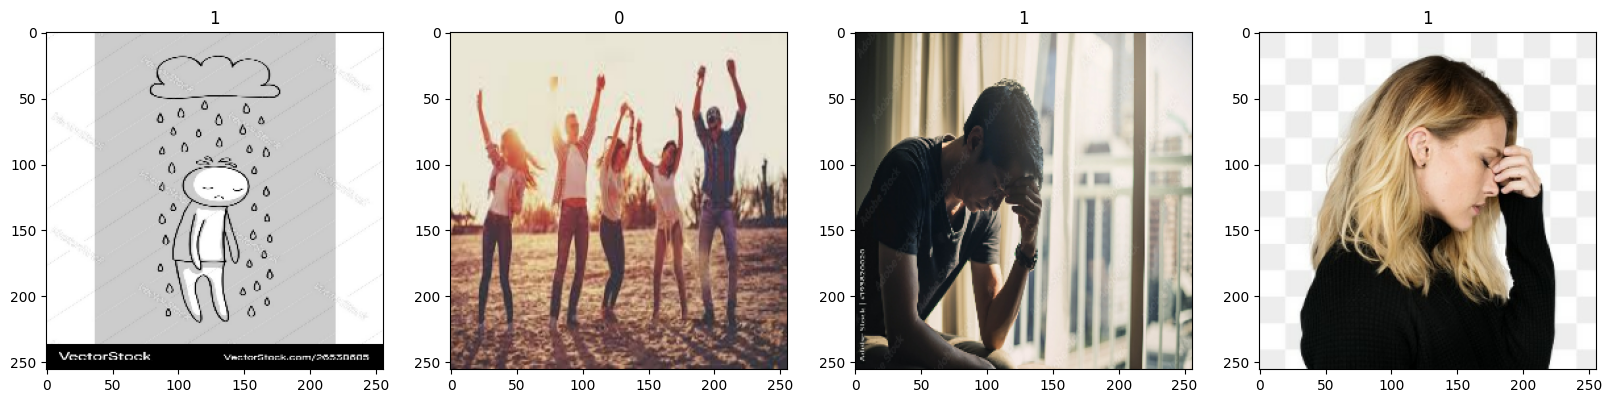

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [18]:
#scale data
#batch[0] -> represents the images and batch[1]-> represents the labels

scaled = batch[0] / 255 #inefficient method of scaling
print(scaled.min())
print(scaled.max())

0.0
1.0


In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
scaled_iter = data.as_numpy_iterator()

In [21]:
batch = scaled_iter.next()

In [22]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


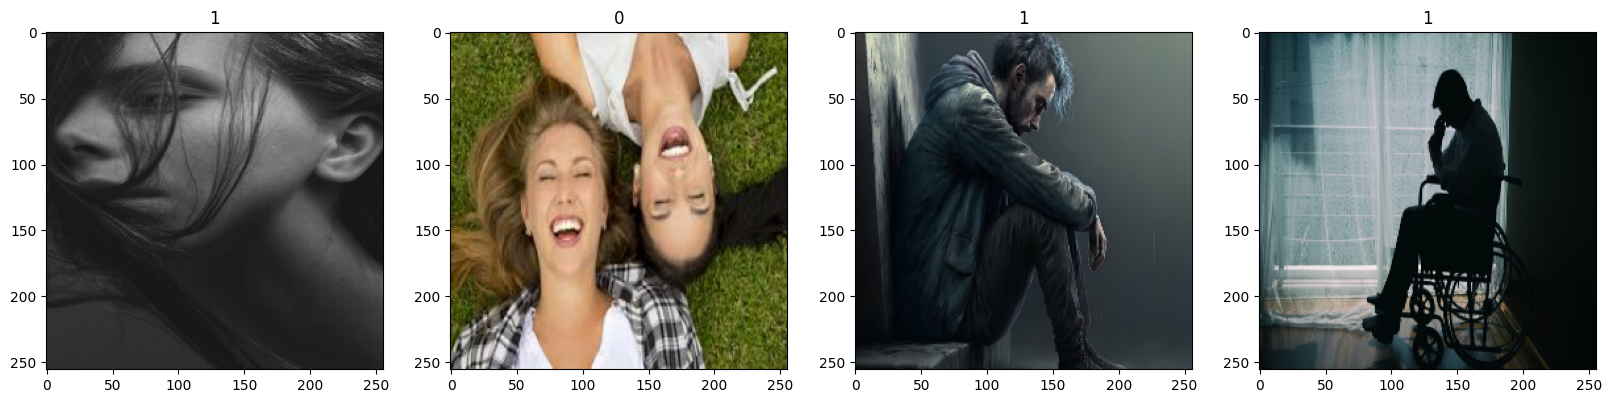

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [24]:
#split data
len(data) #number of batches

6

In [30]:
train_size = int(len(data)*.6)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [31]:
print(train_size)
print(test_size)
print(val_size)

4
1
1


In [32]:
#tensorflow dataset api method
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
#Deep Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [60]:
model = Sequential()

In [61]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [64]:
#train the model
logdir = 'logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 4s 487ms/step - loss: 1.1772 - accuracy: 0.4531 - val_loss: 0.7758 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 3s 463ms/step - loss: 0.7745 - accuracy: 0.4062 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 2s 430ms/step - loss: 0.6490 - accuracy: 0.8047 - val_loss: 0.5567 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 5s 906ms/step - loss: 0.6037 - accuracy: 0.5781 - val_loss: 0.5421 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 3s 473ms/step - loss: 0.5345 - accuracy: 0.7500 - val_loss: 0.5479 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 2s 433ms/step - loss: 0.4550 - accuracy: 0.8203 - val_loss: 0.4145 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 2s 429ms/step - loss: 0.5249 - accuracy: 0.7422 - val_loss: 0.2973 - val_accuracy: 0.8750
Epoch 8/20
4/4 [====

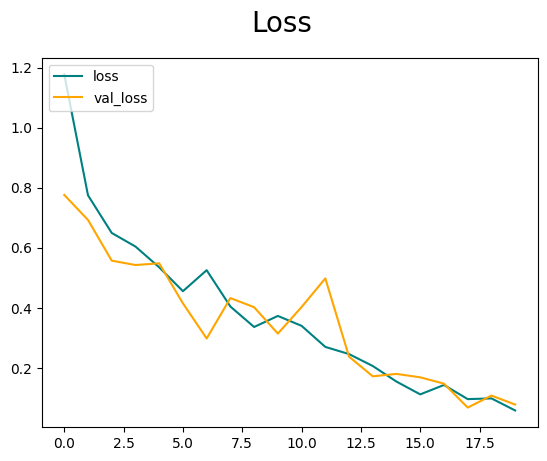

In [67]:
#plot the performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

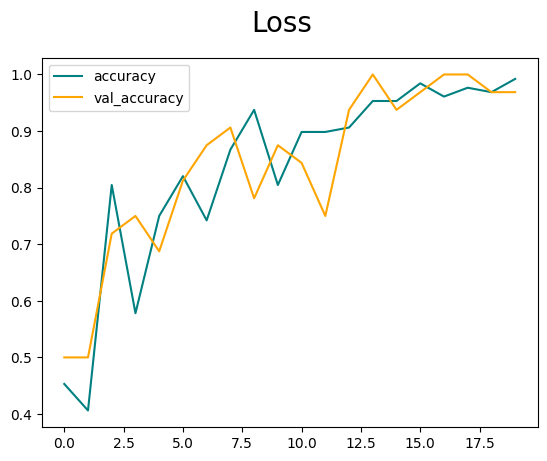

In [68]:
#plot the performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [69]:
#test partition
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [70]:
len(test)


1

In [71]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 80ms/step


In [72]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [73]:
#test
import cv2

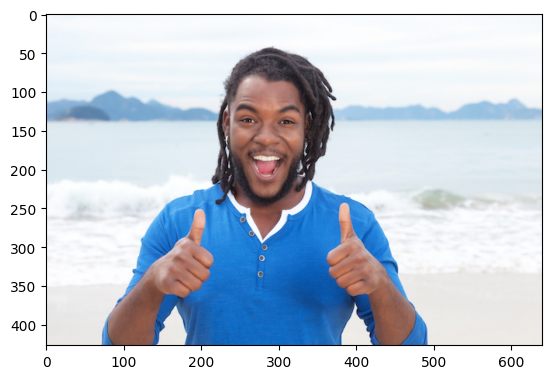

In [92]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

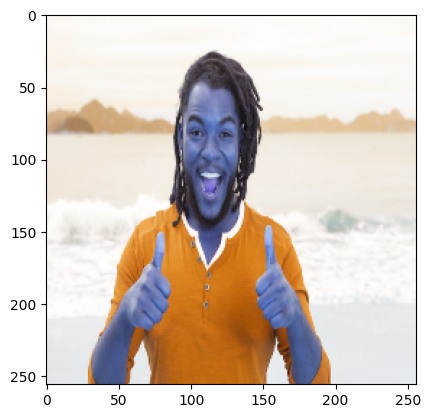

In [93]:
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [94]:
yhat = model.predict(np.expand_dims(resized/255, 0))

1/1 [==============================] - 0s 87ms/step


In [95]:
print(yhat)
if yhat>0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

[[0.01209802]]
Predicted class is Happy


In [84]:
#save the model
from tensorflow.keras.models import load_model

In [85]:
model.save(os.path.join('models', 'imageClassification.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
new_model = load_model(os.path.join('models', 'imageClassification.h5'))

In [87]:
new_model.predict(np.expand_dims(resized/255, 0))

1/1 [==============================] - 0s 69ms/step


array([[0.01209802]], dtype=float32)